# Machine Learning Master Notes 5 - Linear Regression (One Feature with Intercept)

## Linear Regression (One Feature with Intercept)

Now, we can improve our understanding by adding `b` (y-intercept) back into our equation.

### Prepare Environment

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

## Linear Regression (One Feature) and Cost Function


In summary, for one feature linear regression:

Hypothesis: $$f_{w,b}(x)=wx+b$$

Parameters:	$$w ,b$$

Cost Function:	$$J(w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)})-y^{(i)})^{2}$$ 


similarly $$J(w, b) = \sum\limits_{i=0}^{m-1} ((wx^{(i)} + b)-y^{(i)})^{2}$$

Goal: minimize $J(w, b)$


## Linear Regression (One Feature) Best Fit Line (Another 3 Points Example with Intercept)

First, let's use another 3 data points example:

In [2]:
x = np.array([1,2,3])
y = np.array([3,4,5])

The actual formula will be:
$$y = wx + b$$
$$y = 1x + 2$$

Thus
$$w = 1, b = 2$$

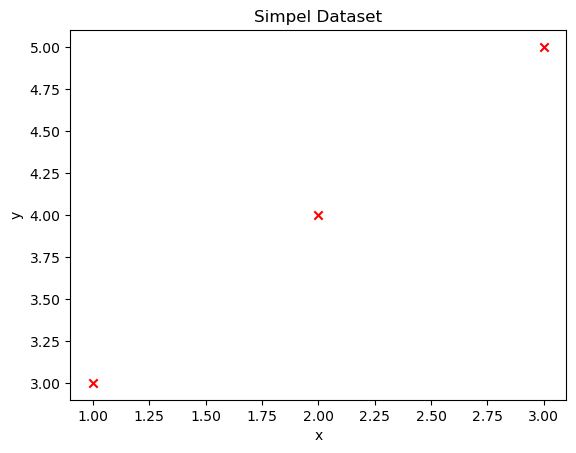

In [3]:
fig = plt.figure()
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Simpel Dataset")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.show()

In [4]:
def compute_prediction_line(x,w,b):
    m = len(x)
    f = np.zeros(m)
    for i in range(m):
        f[i] = (x[i] * w) + b 
        
    return f


b is 0
w is 0


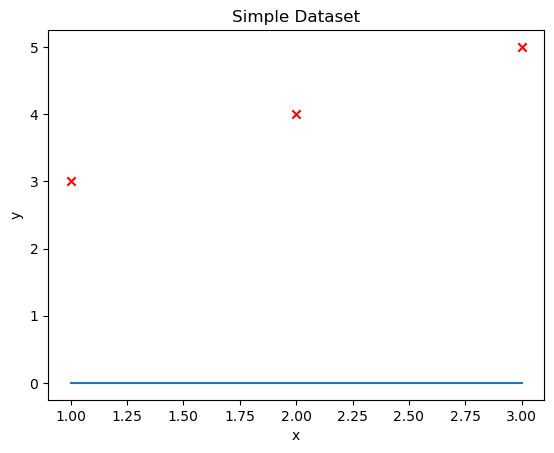

b is 0
w is 1


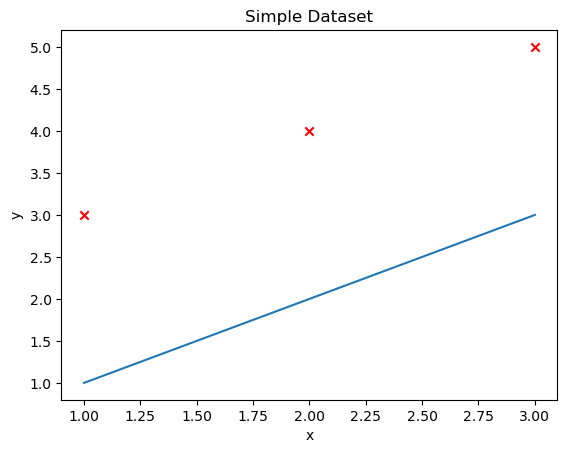

b is 0
w is 2


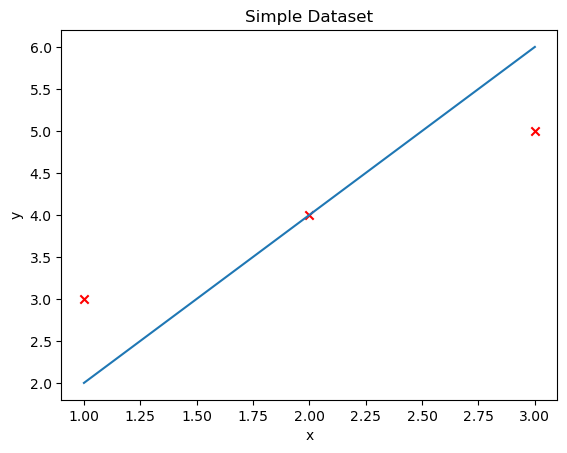

b is 0
w is 3


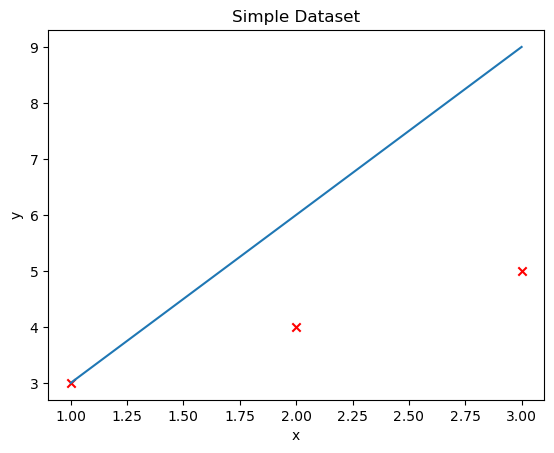

b is 0
w is 4


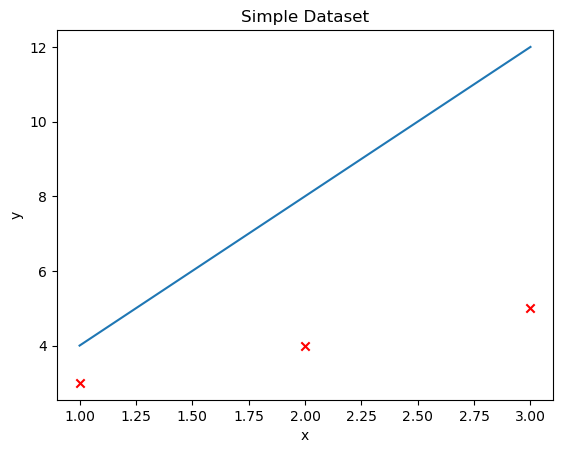

b is 1
w is 0


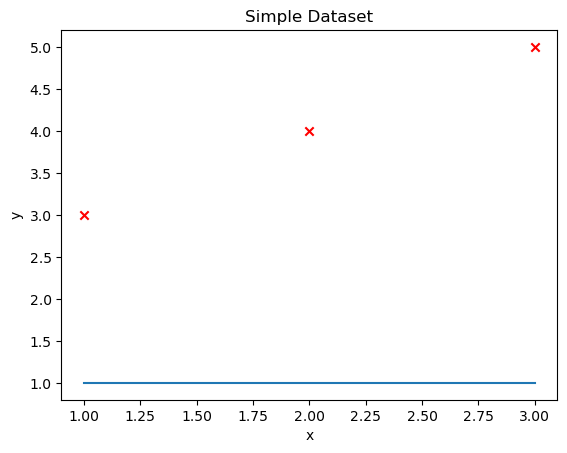

b is 1
w is 1


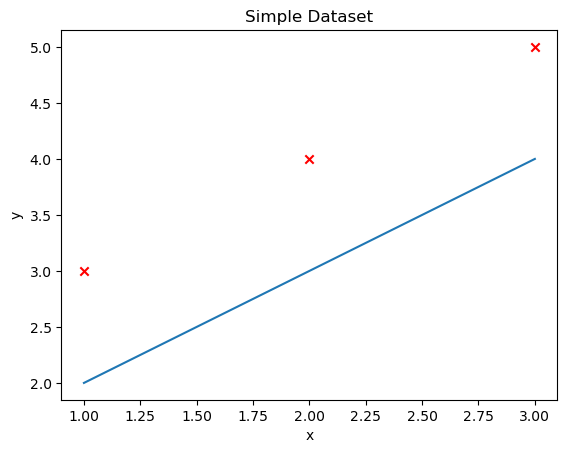

b is 1
w is 2


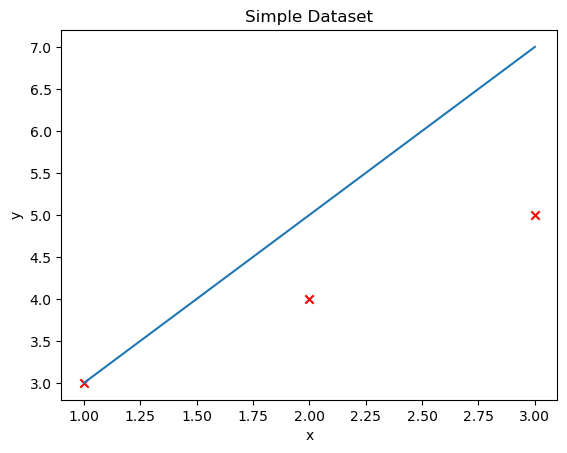

b is 1
w is 3


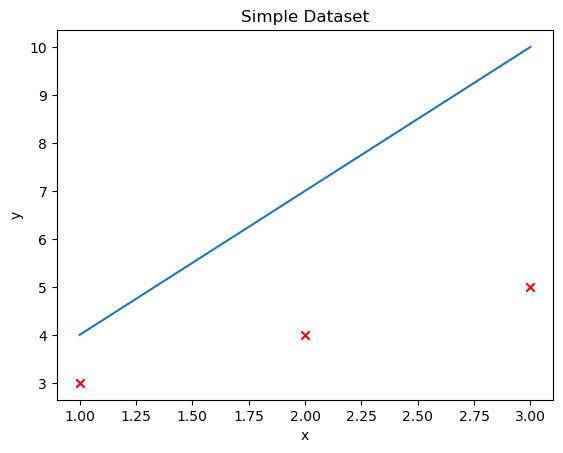

b is 1
w is 4


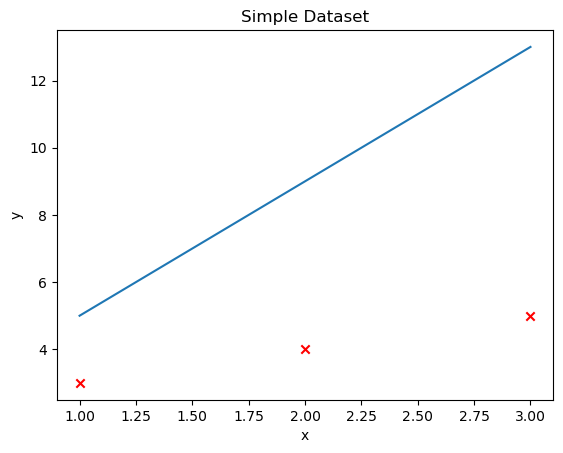

b is 2
w is 0


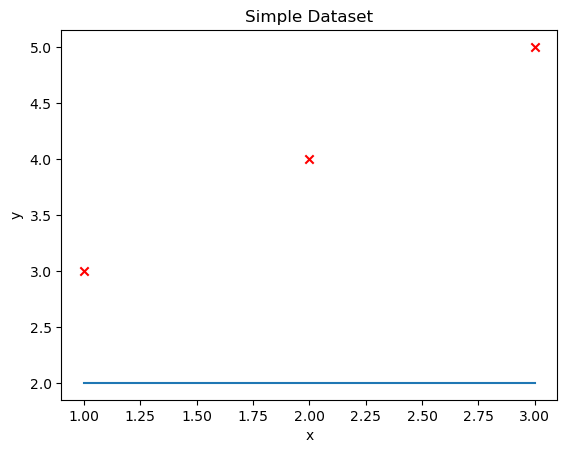

b is 2
w is 1


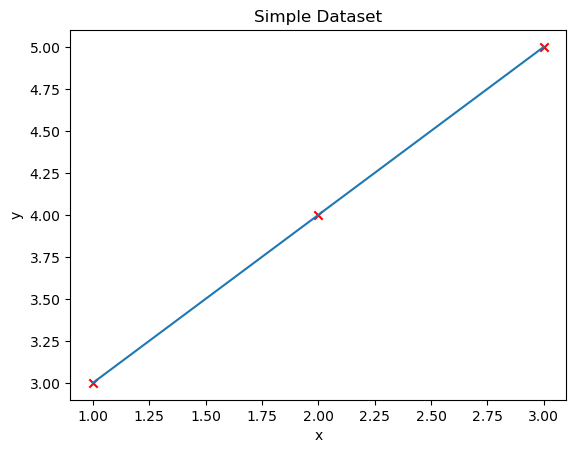

b is 2
w is 2


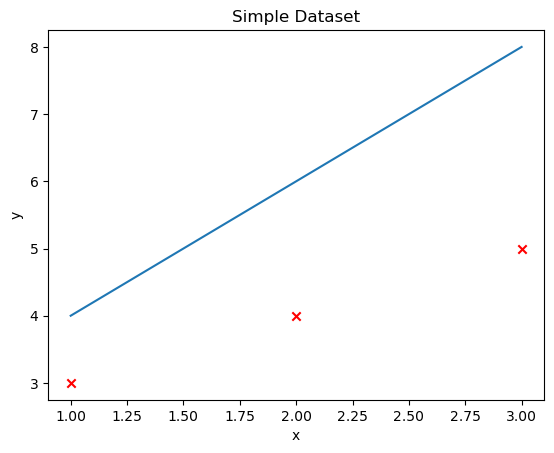

b is 2
w is 3


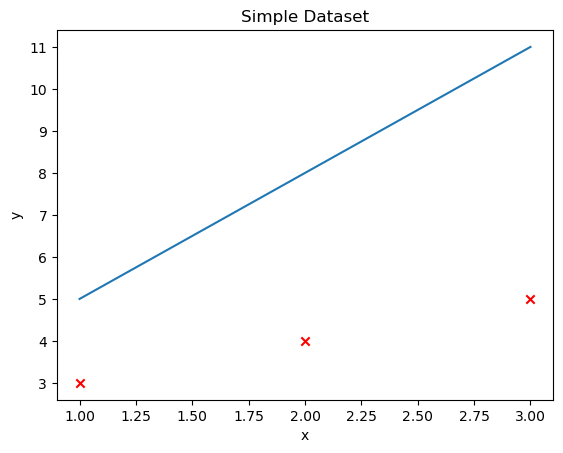

b is 2
w is 4


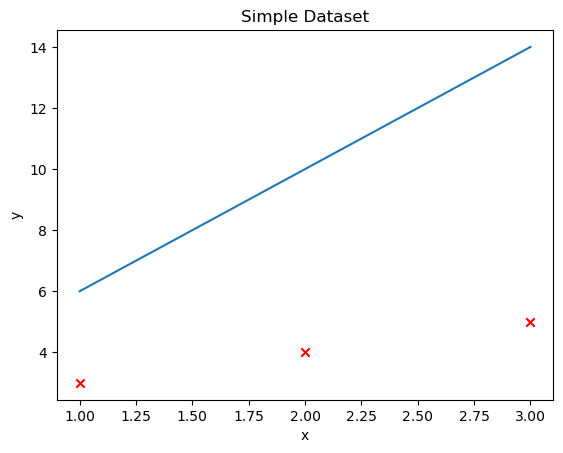

b is 3
w is 0


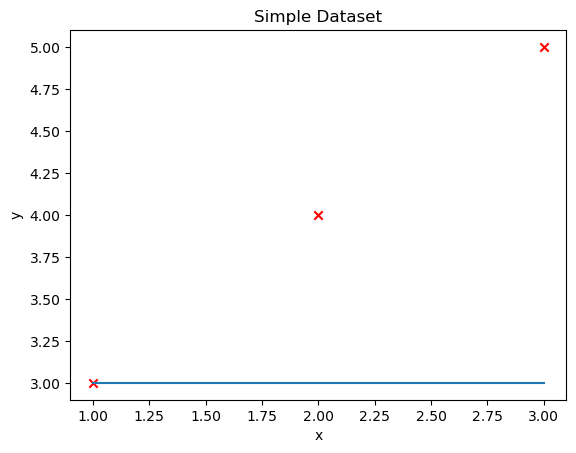

b is 3
w is 1


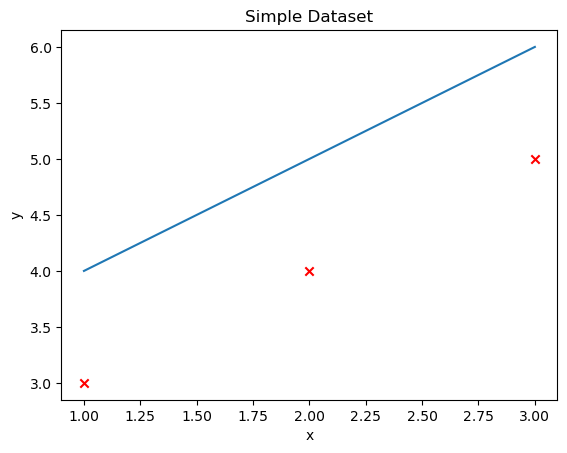

b is 3
w is 2


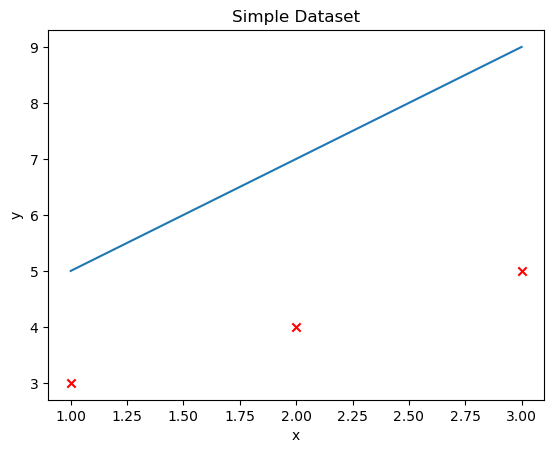

b is 3
w is 3


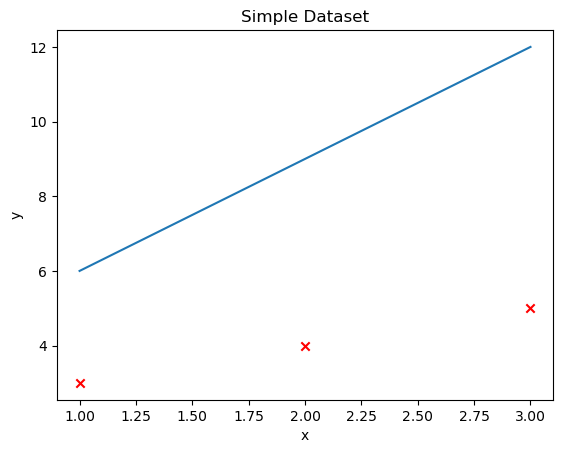

b is 3
w is 4


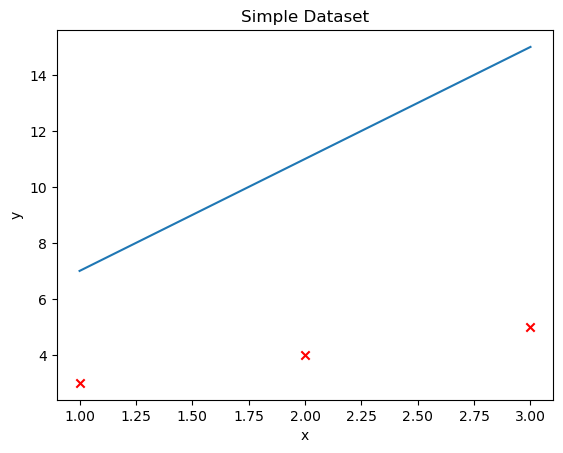

b is 4
w is 0


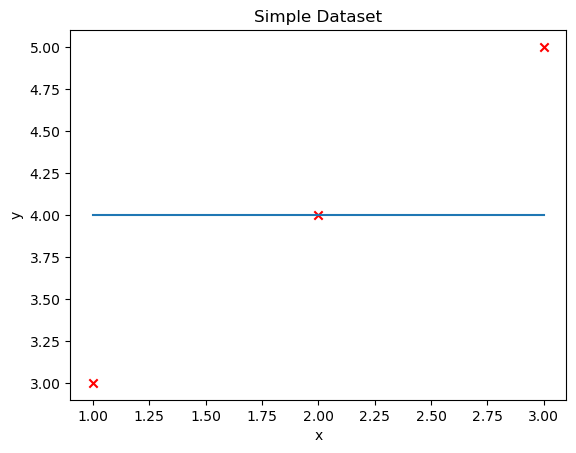

b is 4
w is 1


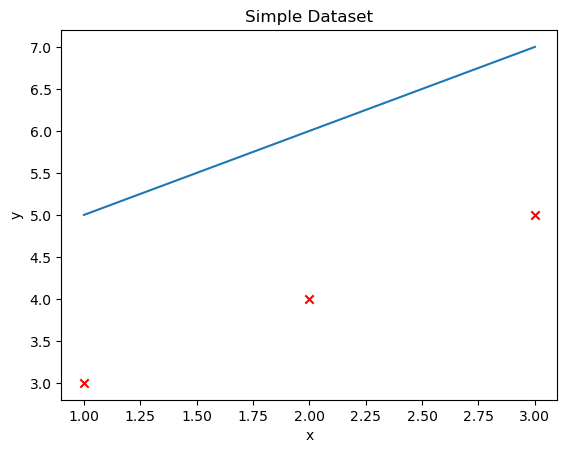

b is 4
w is 2


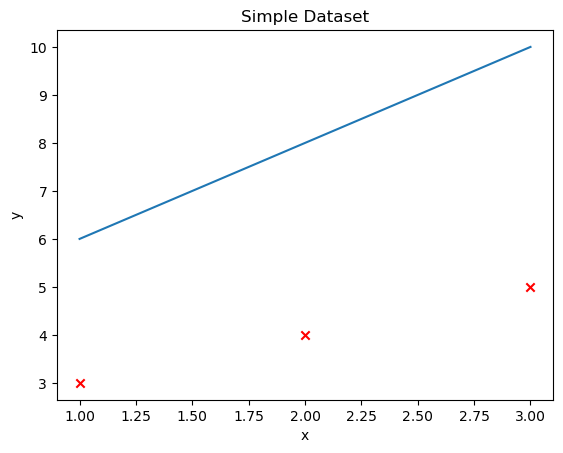

b is 4
w is 3


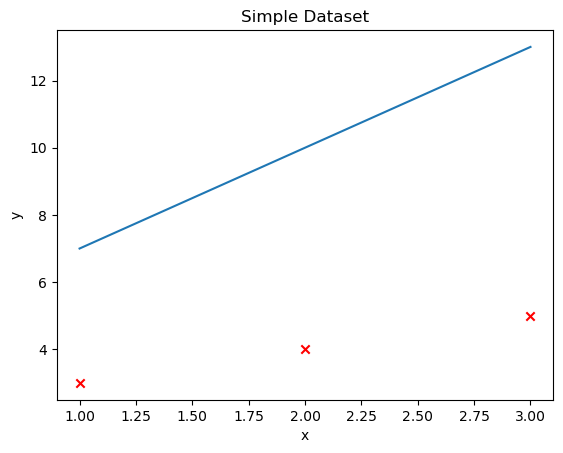

b is 4
w is 4


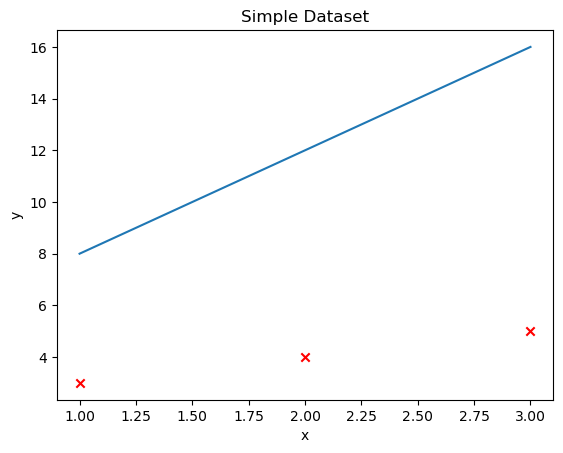

In [5]:
# Plot the data points
for b in range(0,5):    
    for w in range(0,5): 
        print(f'b is {b}')
        print(f'w is {w}')
        line = compute_prediction_line(x,w,b)
        fig = plt.figure()
        plt.scatter(x, y, marker='x', c='r',label='Actual Values')
        plt.plot(x, line, label=str('Our Prediction b ='+str(b)+ ' w = ' + str(w)))
        # Set the title
        plt.title("Simple Dataset")
        # Set the y-axis label
        plt.ylabel('y')
        # Set the x-axis label
        plt.xlabel('x')
        #plt.legend()
        plt.show()


From the graph above we can see that **b = 2 and w = 1** fits the line. You can also see that complexity increases when we add the y-intercept into the equation. 

We have to plot 25 prediction lines into a graph.

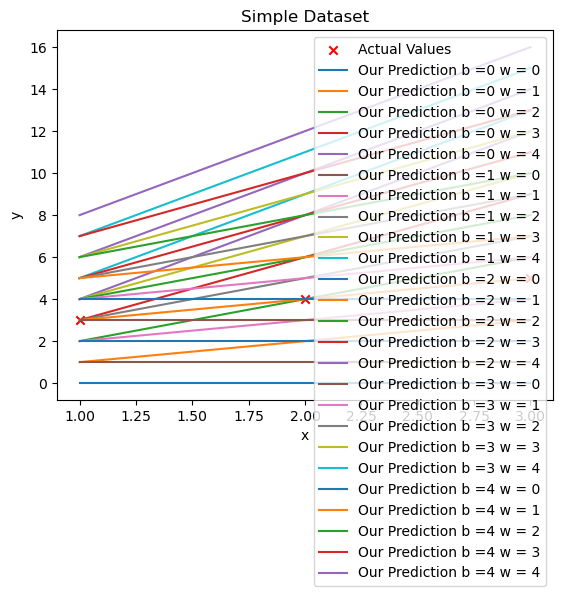

In [6]:
plt.scatter(x, y, marker='x', c='r',label='Actual Values')
for b in range(0,5):    
    for w in range(0,5): 
        #print(f'b is {b}')
        #print(f'w is {w}')
        line = compute_prediction_line(x,w,b)        
        plt.plot(x, line, label=str('Our Prediction b ='+str(b)+ ' w = ' + str(w)))
# Set the title
plt.title("Simple Dataset")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()

**The graphs also becomes complicated when we add y-intercept. New lets compute the cost function directly.**

## Computing Cost Function with Intercept (Another 3 Points Example with Intercept)

In [7]:
def cost_function(x,y,b,w):
    m = len(x)
    sumAll = 0
    for i in range(m):
        fx = (w * x[i]) + b
        costEachEx= (fx - y[i]) ** 2
        sumAll += costEachEx

    return (1 / (2 * m)) * sumAll


In [8]:
x = np.array([1,2,3])
y = np.array([3,4,5])

for b in range(0,10):
    for w in range(0,10):
        cost = cost_function(x,y,b,w)
        print(f"If b = {b} and w = {w}, then the cost is :{cost}.")  

If b = 0 and w = 0, then the cost is :8.333333333333332.
If b = 0 and w = 1, then the cost is :2.0.
If b = 0 and w = 2, then the cost is :0.3333333333333333.
If b = 0 and w = 3, then the cost is :3.333333333333333.
If b = 0 and w = 4, then the cost is :11.0.
If b = 0 and w = 5, then the cost is :23.333333333333332.
If b = 0 and w = 6, then the cost is :40.33333333333333.
If b = 0 and w = 7, then the cost is :62.0.
If b = 0 and w = 8, then the cost is :88.33333333333333.
If b = 0 and w = 9, then the cost is :119.33333333333333.
If b = 1 and w = 0, then the cost is :4.833333333333333.
If b = 1 and w = 1, then the cost is :0.5.
If b = 1 and w = 2, then the cost is :0.8333333333333333.
If b = 1 and w = 3, then the cost is :5.833333333333333.
If b = 1 and w = 4, then the cost is :15.5.
If b = 1 and w = 5, then the cost is :29.833333333333332.
If b = 1 and w = 6, then the cost is :48.83333333333333.
If b = 1 and w = 7, then the cost is :72.5.
If b = 1 and w = 8, then the cost is :100.8333333

We can modified the code above to find the lowest cost.

In [9]:
x = np.array([1,2,3])
y = np.array([3,4,5])

lowest = None
lowest_b = 0
lowest_w = 0
for b in range(0,10):
    for w in range(0,10):
        cost = cost_function(x,y,b,w)
        if lowest is None:
            lowest = cost
            lowest_b = b
            lowest_w = w
        elif lowest > cost:
            lowest = cost
            lowest_b = b
            lowest_w = w
        #print(f"If b = {b} and w = {w}, then the cost is :{cost}.")    

print(f"The lowest cost is {lowest}==> b is {lowest_b} and w is {lowest_w}")

The lowest cost is 0.0==> b is 2 and w is 1


<div class="alert alert-block alert-info">

**Note:**

As you can see, for linear equations, we can program a code to find the lowest cost. However,things get complicated if we introduce more variables (more $x$). Furthermore our range to test $b$ and $w$ is very narrow. In real life application, we would not know where $b$ and $w$ lies. Thus we may need to test more combinations. If we are computing $b$ and $w$ of 1000 possible value, the combination would be 1000 * 1000 computations. Thus, we need a different algorithm that can work with multiple conditions effectively.
</div>

Before we start looking for ways to find the best fit line. We need to examine the relationship between cost function and weights. We also explore relationship between cost function and intercept.

## End of Note 5